In [3]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [4]:
email = "lilu216@hotmail.com"
api&key = baygoose48

test_url =" https://aqs.epa.gov/data/api/list/states?email=test@aqs.api&key=test"
#test_2_url = "url": "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=45201&bdate=20180101&edate=20181231&state=37"
criteria = "https://aqs.epa.gov/data/api/list/parametersByClass?email=test@aqs.api&key=test&pc=CRITERIA"


SyntaxError: can't assign to operator (<ipython-input-4-05be2b60c47a>, line 2)

In [5]:
url = "https://aqs.epa.gov/data/api/qaBlanks/byState?email=test@aqs.api&key=test&param=88101&bdate=20170101&edate=20170131&state=01"
url_alabama_co = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=42602&bdate=20170101&edate=20171231&state=01"
response = requests.get(url_alabama_co).json()
print(json.dumps(response, indent=4, sort_keys=True))



#will need to change to the 5 parameters we agreed on. Then take averages for each state/cities. 

{
    "Data": [
        {
            "arithmetic_mean": 8.974158,
            "cbsa": "Birmingham-Hoover, AL",
            "cbsa_code": "13820",
            "certification_indicator": "Certified",
            "city": "Birmingham",
            "county": "Jefferson",
            "county_code": "073",
            "date_of_last_change": "2018-02-21",
            "datum": "WGS84",
            "event_type": "No Events",
            "exceptional_data_count": 0,
            "fiftieth_percentile": 6.1,
            "first_max_datetime": "2017-01-31 18:00",
            "first_max_n_o_datetime": null,
            "first_max_nonoverlap_value": null,
            "first_max_value": 40.8,
            "fourth_max_datetime": "2017-05-08 20:00",
            "fourth_max_value": 38.7,
            "latitude": 33.553056,
            "local_site_name": "North Birmingham",
            "longitude": -86.815,
            "method": "Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence",
            

In [7]:
#could compare levels of NO2 across states. compare max dates for when the most pollution is. 
state_query_url = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=42602&bdate=20170101&edate=20171231&state="

#need to pick the variables we want the measurements for and create a list for each to add to with a for loop.
states = []
mean = []
max_value = []


state_code = ["01", "02", "04", "05", "06", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", 
              "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41",
              "42", "44", "45", "46", "47", "48", "49", "50", "51", "53", "54", "55", "56", "66", "72", "78"]


for code in state_code:
    response = requests.get(state_query_url + code).json()
    try:
        states.extend([x['state'] for x in response['Data']])
        mean.extend([x['arithmetic_mean'] for x in response['Data']])
        max_value.extend([x['first_max_value'] for x in response['Data']])
        
    except: 
        print("This state has no data", code)
    
    


In [9]:
#create a data frame with info from your lists to combine into one dictionary
NO2_dict = {
    "state": states,
    "avg no2": mean,
    "max no2": max_value

 }

#print(no2_dict)

NO2_df = pd.DataFrame(NO2_dict)
NO2_df.head()

,state,avg no2,max no2
0,Alabama,8.974158,40.8
1,Alabama,20.712610,40.8
2,Alabama,11.458696,50.8
3,Alabama,23.389298,50.8
4,Alaska,12.569094,65.7


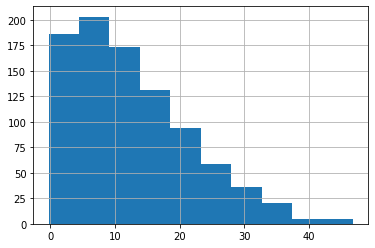

In [27]:
NO2_df = pd.Series([mean])
NO2_df.hist()

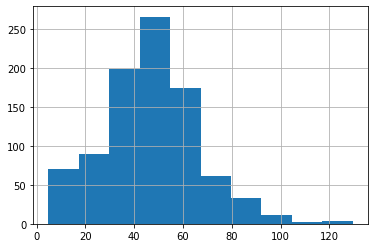

In [28]:
NO2_df = pd.Series([max_value])
NO2_df.hist()

In [11]:
clean_NO2_df = NO2_df.groupby("state").agg({"avg no2":["mean"],"max no2":["max"]}).reset_index()
clean_NO2_df.head()

,state,avg no2,max no2
,,mean,max
0,Alabama,16.133691,50.8
1,Alaska,17.845126,65.7
2,Arizona,23.549218,72.0
3,Arkansas,12.625227,45.0
4,California,14.378532,123.3


In [12]:
health_data_path= "Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (version 1).csv"
health_data = pd.read_csv(health_data_path)
health_data.head()

,"eek, an",YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
2,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"Less than $15,000",INC,INCLESS15
3,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$35,000 - $49,999",INC,INC3550
4,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [13]:
clean_health_data = pd.DataFrame(health_data[["YearEnd","LocationDesc","Question","Data_Value"]])
clean_health_data = clean_health_data.loc[clean_health_data.YearEnd == 2017].rename(columns={"LocationDesc": "state", "YearEnd": "year", "Data_Value":"Percent"}).dropna()
clean_health_data.head()

,year,state,Question,Percent
8961,2017,Alaska,Percent of adults aged 18 years and older who ...,34.3
8962,2017,Alaska,Percent of adults aged 18 years and older who ...,27.5
8963,2017,Alaska,Percent of adults aged 18 years and older who ...,31.4
8965,2017,Alaska,Percent of adults aged 18 years and older who ...,29.8
8966,2017,Alaska,Percent of adults aged 18 years and older who ...,26.1


In [14]:
grp_clean_health_data = pd.DataFrame(clean_health_data.groupby(["Question", "state"]).mean()['Percent'].reset_index())
grp_clean_health_data

,Question,state,Percent
0,Percent of adults aged 18 years and older who ...,Alabama,33.792000
1,Percent of adults aged 18 years and older who ...,Alaska,31.858333
2,Percent of adults aged 18 years and older who ...,Arizona,34.707407
3,Percent of adults aged 18 years and older who ...,Arkansas,36.272000
4,Percent of adults aged 18 years and older who ...,California,35.670370
...,...,...,...
481,Percent of adults who report consuming vegetab...,Virginia,17.003846
482,Percent of adults who report consuming vegetab...,Washington,18.748148
483,Percent of adults who report consuming vegetab...,West Virginia,18.804348
484,Percent of adults who report consuming vegetab...,Wisconsin,20.469231


In [15]:
final_dropped_df = grp_clean_health_data[(grp_clean_health_data.state != "Puerto Rico")&(grp_clean_health_data.state != "Virgin islands")]
final_dropped_df


,Question,state,Percent
0,Percent of adults aged 18 years and older who ...,Alabama,33.792000
1,Percent of adults aged 18 years and older who ...,Alaska,31.858333
2,Percent of adults aged 18 years and older who ...,Arizona,34.707407
3,Percent of adults aged 18 years and older who ...,Arkansas,36.272000
4,Percent of adults aged 18 years and older who ...,California,35.670370
...,...,...,...
481,Percent of adults who report consuming vegetab...,Virginia,17.003846
482,Percent of adults who report consuming vegetab...,Washington,18.748148
483,Percent of adults who report consuming vegetab...,West Virginia,18.804348
484,Percent of adults who report consuming vegetab...,Wisconsin,20.469231


In [16]:
ques1 = final_dropped_df[final_dropped_df["Question"] == "Percent of adults aged 18 years and older who have an overweight classification"]
ques3 = final_dropped_df[final_dropped_df["Question"] == "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)"]
ques2 = final_dropped_df[final_dropped_df["Question"] == "Percent of adults aged 18 years and older who have obesity"]

In [17]:
q1_merge_no2_df = pd.merge(ques1 ,clean_NO2_df, on="state")
q2_merge_no2_df = pd.merge(ques2 ,clean_NO2_df, on="state")
q3_merge_no2_df = pd.merge(ques3 ,clean_NO2_df, on="state")


q1_merge_no2_df.head()

C:\Users\britt\anaconda3\envs\PythonData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\britt\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Question,state,Percent,"(avg no2, mean)","(max no2, max)"
0,Percent of adults aged 18 years and older who ...,Alabama,33.792000,16.133691,50.8
1,Percent of adults aged 18 years and older who ...,Alaska,31.858333,17.845126,65.7
2,Percent of adults aged 18 years and older who ...,Arizona,34.707407,23.549218,72.0
3,Percent of adults aged 18 years and older who ...,Arkansas,36.272000,12.625227,45.0
4,Percent of adults aged 18 years and older who ...,California,35.670370,14.378532,123.3


In [19]:
#using weather homework, take matplotlib regression technique to apply to new graphs


def linear_regress(xdata, ydata, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)

# Get regression values
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(xdata, ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: 0.007104961894014327


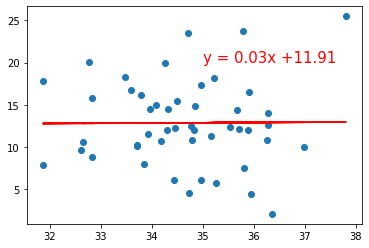

In [20]:
#Create a graph comparing the value of the question above to the average NO2 levels by state

xdata = q1_merge_no2_df['Percent']
ydata = q1_merge_no2_df['avg no2', 'mean']
coordinates = (35, 20)

linear_regress(xdata, ydata, coordinates)

The r-squared is: 0.0681236980150362


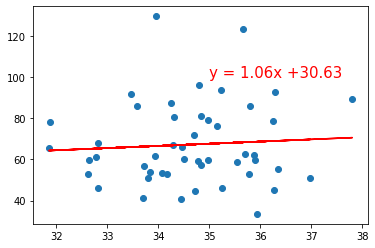

In [21]:
#Create a graph comparing the value of the question to the highest value of NO2 by state. See if there is a comparison
#you can draw from the previous graph and this one
xdata = q1_merge_no2_df['Percent']
ydata = q1_merge_no2_df['max no2', 'max']
coordinates = (35, 100)

linear_regress(xdata, ydata, coordinates)

The r-squared is: -0.09874170837526391


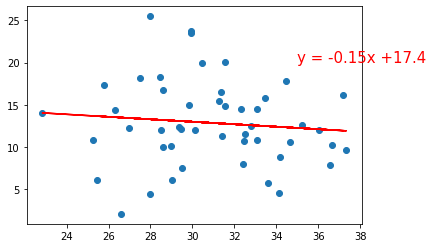

In [22]:
xdata = q2_merge_no2_df['Percent']
ydata = q2_merge_no2_df['avg no2', 'mean']
coordinates = (35, 20)

linear_regress(xdata, ydata, coordinates)

The r-squared is: 0.0681236980150362


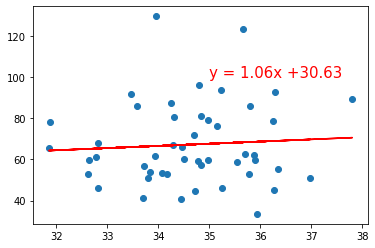

In [23]:
xdata = q1_merge_no2_df['Percent']
ydata = q1_merge_no2_df['max no2', 'max']
coordinates = (35, 100)

linear_regress(xdata, ydata, coordinates)